In [1]:
import simulate
import market
import withdrawal
import harvesting
from import portfolio import Portfolio

from decimal import Decimal
import pandas
import seaborn
from matplotlib import pyplot as plt
import matplotlib
seaborn.set(style="whitegrid")
seaborn.set_context('poster')

In [2]:
def plot(sim, year, lens):
    plt.figure(figsize=(12,6))
    plt.title('Portfolio value')
    s = pandas.Series([lens(n) for n in sim], index=range(year, year+len(sim)))
    g = seaborn.lineplot(data=s)
    seaborn.despine(left=True, bottom=True, offset=20)
    g.axes.yaxis.set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))    

In [3]:
MARKET = market.Returns_US_1871()

In [29]:
year = 1969

s_swr = simulate.withdrawals(MARKET.iter_from(year),
                             years=35,
    portfolio=(500_000, 0),
    harvesting=harvesting.N_80_RebalanceHarvesting,
    withdraw=withdrawal.ConstantDollar
)
s_vpw = simulate.withdrawals(MARKET.iter_from(year),
                             years=35,
    portfolio=(500_000, 0),
    harvesting=harvesting.N_80_RebalanceHarvesting,
    withdraw=withdrawal.VPW
)

In [30]:
w_sum = [float(x.withdraw_r + y.withdraw_r) for x,y in zip(s_swr, s_vpw)]

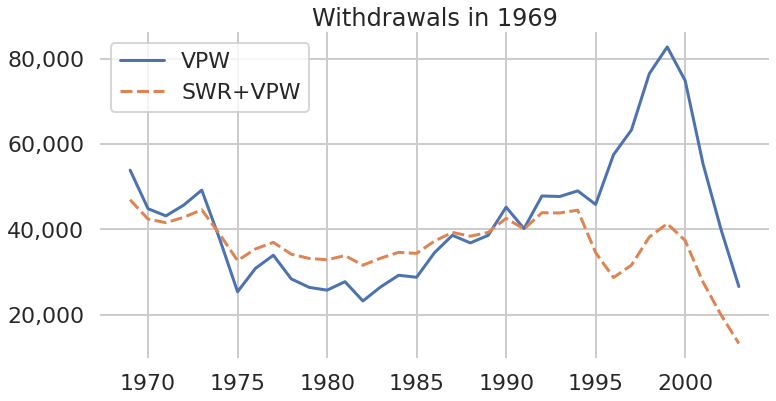

In [31]:
pure_vpw = simulate.withdrawals(MARKET.iter_from(year),
                             years=35,
    portfolio=(1_000_000, 0),
    harvesting=harvesting.N_80_RebalanceHarvesting,
    withdraw=withdrawal.VPW
)
w_vpw = [float(n.withdraw_r) for n in pure_vpw]
plt.figure(figsize=(12,6))
plt.title(f'Withdrawals in {year}')
g = seaborn.lineplot(data=pandas.DataFrame({'VPW' : w_vpw, 'SWR+VPW' : w_sum}, index=range(year, year+len(pure_vpw))))
seaborn.despine(left=True, bottom=True, offset=20)
g.axes.yaxis.set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))    